# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# carrega o dataset já trabalhado com as variáveis dummies na tarefa passada

df = pd.read_csv('credit_score_dummies.csv', encoding='utf-8', na_values=('na','NaN','NAN'))

df.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo,posse_de_veiculo,posse_de_imovel
0,0,0,58.8,3.1,1,0,0,0,2.0,False,1,1,1
1,1,0,52.4,8.4,1,0,1,1,1.0,False,0,0,1
2,3,0,46.2,2.1,1,1,1,1,2.0,False,1,1,1
3,4,0,29.2,3.0,1,0,0,0,2.0,False,0,1,0
4,6,0,27.5,4.0,1,0,1,0,2.0,False,0,0,1


In [4]:
df.dropna(inplace=True)

df.isna().any()

Unnamed: 0               False
qtd_filhos               False
idade                    False
tempo_emprego            False
possui_celular           False
possui_fone_comercial    False
possui_fone              False
possui_email             False
qt_pessoas_residencia    False
mau                      False
sexo                     False
posse_de_veiculo         False
posse_de_imovel          False
dtype: bool

O dataset está sem dados faltantes.

In [5]:
# separa o banco de dados

X = df.drop('mau', axis=1)
y = df['mau']

print(f'y shape {y.shape}, X shape: {X.shape}')

# monta os dados de teste/treino
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

print(f'Total: {df.shape}')
print(f'X_train:{X_train.shape}')
print(f'y_train:{y_train.shape}')

print(f'X_test:{X_test.shape}')
print(f'y_test:{y_test.shape}')

y shape (5586,), X shape: (5586, 12)
Total: (5586, 13)
X_train:(3910, 12)
y_train:(3910,)
X_test:(1676, 12)
y_test:(1676,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [36]:
# definindo a árvore de regressão

clf = DecisionTreeClassifier(random_state=0)

clf = clf.fit(X_train,y_train)

In [37]:
clf

DecisionTreeClassifier(random_state=0)

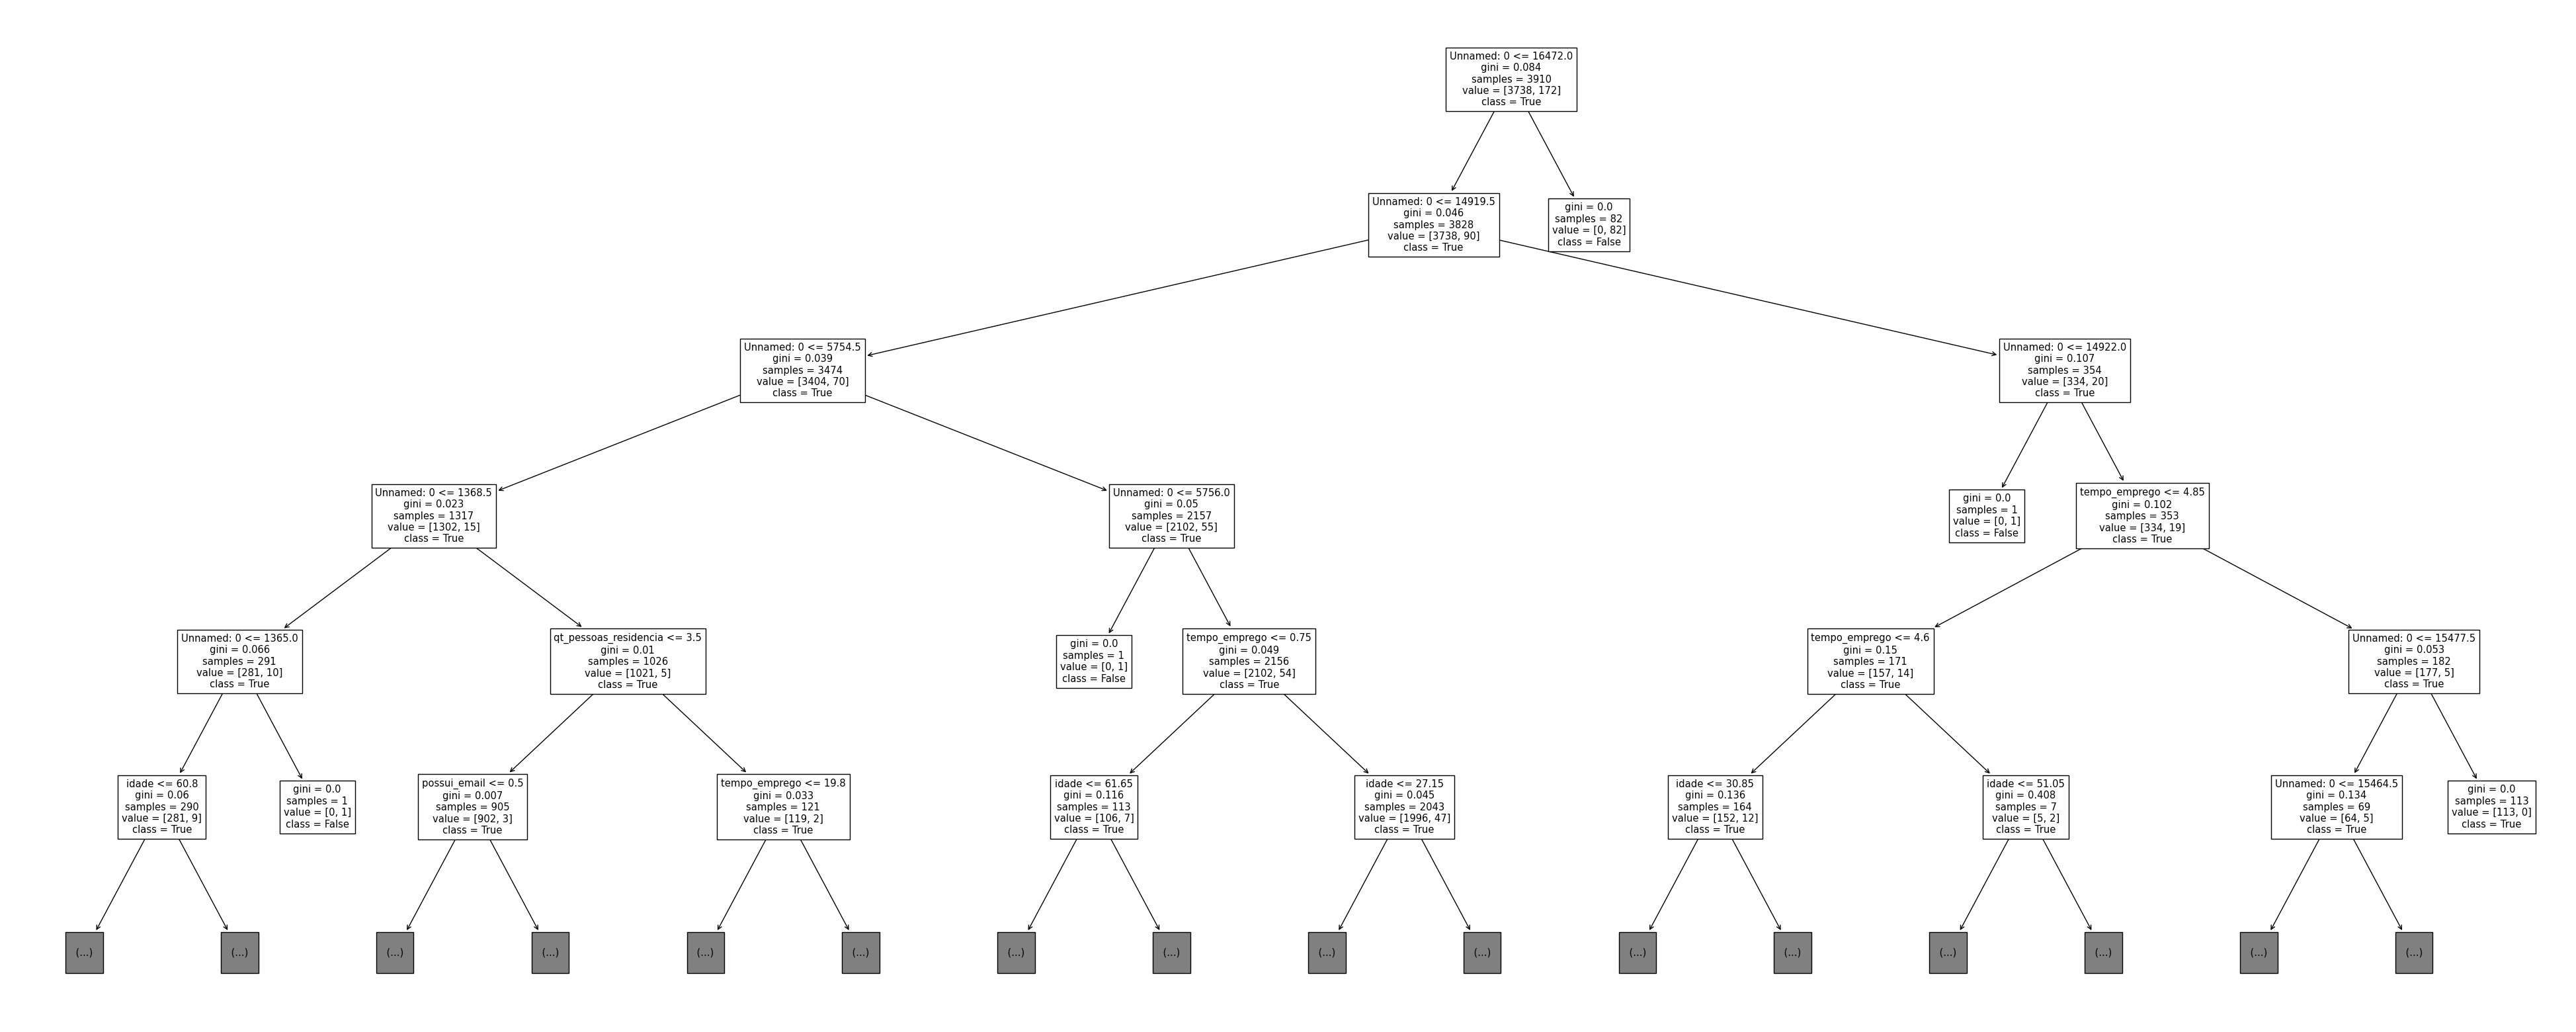

In [39]:
plt.figure(figsize=(50,20))
plot_tree(clf,
         max_depth=5,
         class_names=['True', 'False'],
         feature_names=X_train.columns);

### Lembrando que 'True' significa ser default. Isto é, ser mau pagador.

In [56]:
accuracy_score(y_train,clf.predict(X_train))

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

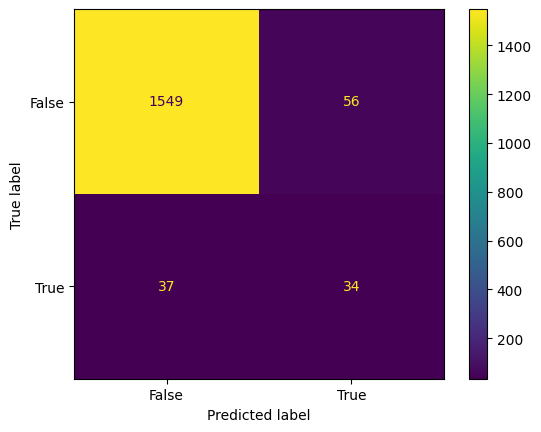

In [49]:
# plot matriz de confusão para a base de teste

predictions_test = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

disp.plot()

In [48]:
# mede a acurácia para a base de teste

predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9445107398568019

### A acurácia da base de testes é levemente menor que da base de treinamento. Já que a base de treinamento está 'overfitada'.

In [58]:
# criando uma nova árvore

clf_1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

clf_1 = clf_1.fit(X_train, y_train)

In [71]:
y_teste_1 = list(clf.predict(X_test))

count_true = y_teste_1.count(True)
count_false = y_teste_1.count(False)
print(count_true)
print(count_false)

90
1586


### 90 clientes foram classificados como 'maus'

In [81]:
# coloca todos os valores 'False', isto é, bons pagadores

y_teste_2 = [False if boolean == True else boolean for boolean in y_teste_1]

accuracy_score(y_test, y_teste_2)

0.9576372315035799

### A acurácia não muda muito. Provalvelmente devido ao fato de ter poucos clientes 'defaults'